# Instructor Do: The K-Means Algorithm

In [18]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas
from pathlib import Path

In [19]:
# Loading data
file_path = Path("data/new_iris_data.csv")
df_iris = pd.read_csv(file_path)
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Using K-Means

In [20]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

In [21]:
# Fitting model
model.fit(df_iris)

KMeans(n_clusters=3, random_state=5)

In [22]:
# Get predictions
predictions = model.predict(df_iris)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [23]:
# Add a new class column to df_iris
df_iris["class"] = model.labels_
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [24]:
# Plotting the clusters with two features
df_iris.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

:NdOverlay   [class]
   :Scatter   [sepal_length]   (sepal_width)

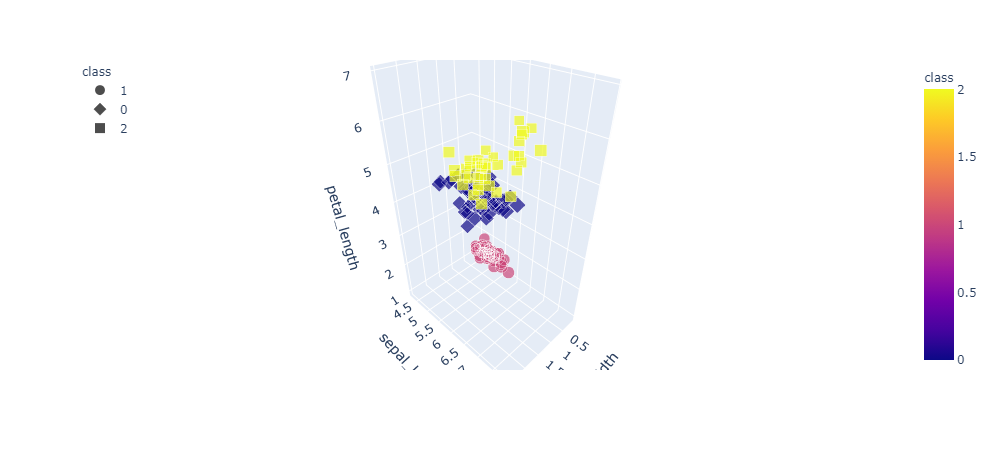

In [34]:
# Plotting the clusters with three features
fig = px.scatter_3d(
    df_iris,
    x="petal_width",
    y="sepal_length",
    z="petal_length",
    color="class",
    symbol="class",
    size="sepal_width",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

## Finding the best value for _k_ using the Elbow Curve

In [32]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)